In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import math 
import tensorflow as tf
import pandas_ta as ta
import pandas_datareader as web 
import matplotlib.pyplot as plt  

In [2]:
# Download Apple stock data
# -----------------------------------------------

stock_ticker = yf.Ticker("AAPL")
stock_data = stock_ticker.history(period="max")
# Convert the index to a datetime object
stock_data.index = pd.to_datetime(stock_data.index)

# Format the datetime index to "YYYY-MM-DD"
stock_data.index = stock_data.index.strftime('%Y-%m-%d')

# convert to lowercase comlumn name 
stock_data.columns = [c.lower() for c in stock_data.columns]

# Convert  indexes to datetime just to be sure
stock_data.index = pd.to_datetime(stock_data.index)

del stock_data["dividends"]
del stock_data["stock splits"]
del stock_data["volume"]

In [3]:
stock_data

,open,high,low,close
Date,,,,
1980-12-12,0.098943,0.099373,0.098943,0.098943
1980-12-15,0.094211,0.094211,0.093781,0.093781
1980-12-16,0.087328,0.087328,0.086898,0.086898
1980-12-17,0.089049,0.089479,0.089049,0.089049
1980-12-18,0.091630,0.092061,0.091630,0.091630
...,...,...,...,...
2024-08-07,206.660786,213.392999,206.151381,209.577423
2024-08-08,212.863619,213.952355,208.588569,213.063385
2024-08-09,211.854792,216.529374,211.724938,215.990005


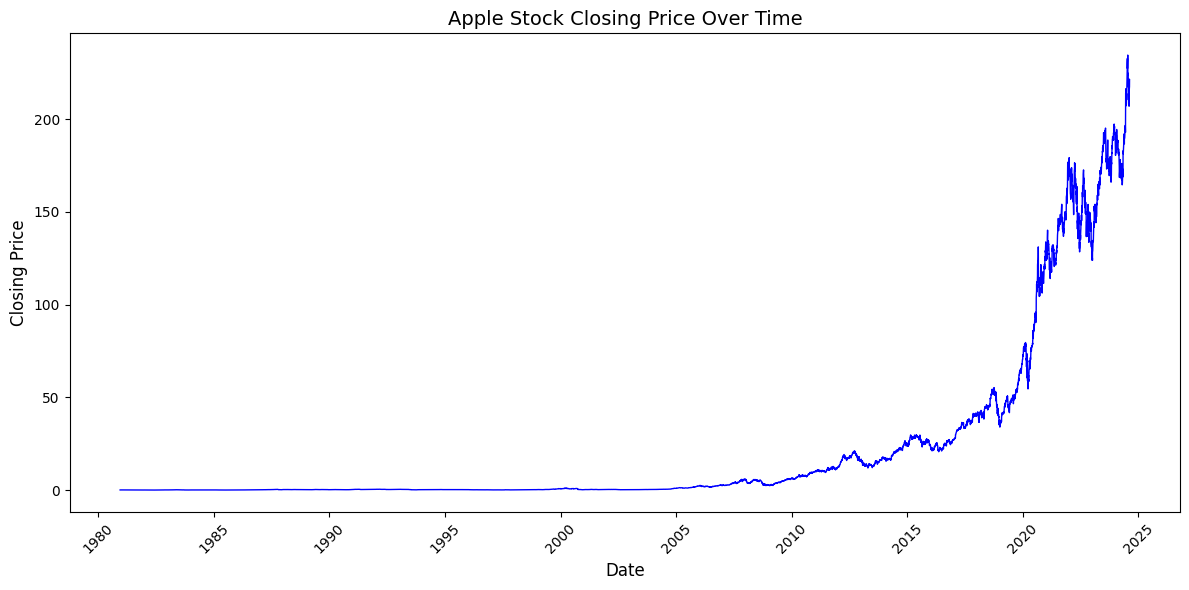

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['close'], linestyle='-', color='b', linewidth=1)
plt.title('Apple Stock Closing Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# inspect the data see the correlation between each column 

# Calculate the correlation matrix
correlation_matrix = stock_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# To focus specifically on how each column correlates with 'close'
close_correlations = correlation_matrix['close']

# Print the correlations with the 'close' column
print("\nCorrelation with 'close':")
print(close_correlations)

Correlation Matrix:
           open      high       low     close
open   1.000000  0.999942  0.999942  0.999873
high   0.999942  1.000000  0.999923  0.999942
low    0.999942  0.999923  1.000000  0.999940
close  0.999873  0.999942  0.999940  1.000000

Correlation with 'close':
open     0.999873
high     0.999942
low      0.999940
close    1.000000
Name: close, dtype: float64


In [12]:
# view outliers 
# --------------------------------------------

from scipy import stats

# Calculate Z-scores
stock_data['z_score'] = stats.zscore(stock_data['close'])

# Define outliers as those with Z-scores > 3 or < -3
outliers = stock_data[(stock_data['z_score'] > 3) | (stock_data['z_score'] < -3)]

# Print number of outliers and the outliers themselves
print(f'Number of outliers: {outliers.shape[0]}')
print(outliers)

Number of outliers: 457
                  open        high         low       close   z_score
Date                                                                
2021-11-24  158.333259  159.702361  157.239947  159.505371  3.002142
2021-11-30  157.584669  163.031528  157.515714  162.814835  3.074224
2021-12-01  164.962050  167.739660  162.056404  162.292801  3.062854
2021-12-02  156.353486  161.731392  155.427616  161.298004  3.041186
2021-12-06  161.820036  165.356074  161.810191  162.834564  3.074654
...                ...         ...         ...         ...       ...
2024-08-07  206.660786  213.392999  206.151381  209.577423  4.092747
2024-08-08  212.863619  213.952355  208.588569  213.063385  4.168674
2024-08-09  211.854792  216.529374  211.724938  215.990005  4.232418
2024-08-12  216.070007  219.509995  215.600006  217.529999  4.265960
2024-08-13  219.009995  221.889999  219.009995  221.270004  4.347420

[457 rows x 5 columns]


In [13]:
# Filter data for dates from 2019 onwards
del stock_data["z_score"]
stock_data_filtered = stock_data[stock_data.index.year >= 2019]

stock_data_filtered

,open,high,low,close
Date,,,,
2019-01-02,37.025776,37.972398,36.868005,37.750084
2019-01-03,34.417789,34.833729,33.944479,33.989899
2019-01-04,34.549264,35.510228,34.374761,35.440903
2019-01-07,35.546089,35.577166,34.876760,35.362022
2019-01-08,35.751657,36.291902,35.503051,36.036121
...,...,...,...,...
2024-08-07,206.660786,213.392999,206.151381,209.577423
2024-08-08,212.863619,213.952355,208.588569,213.063385
2024-08-09,211.854792,216.529374,211.724938,215.990005


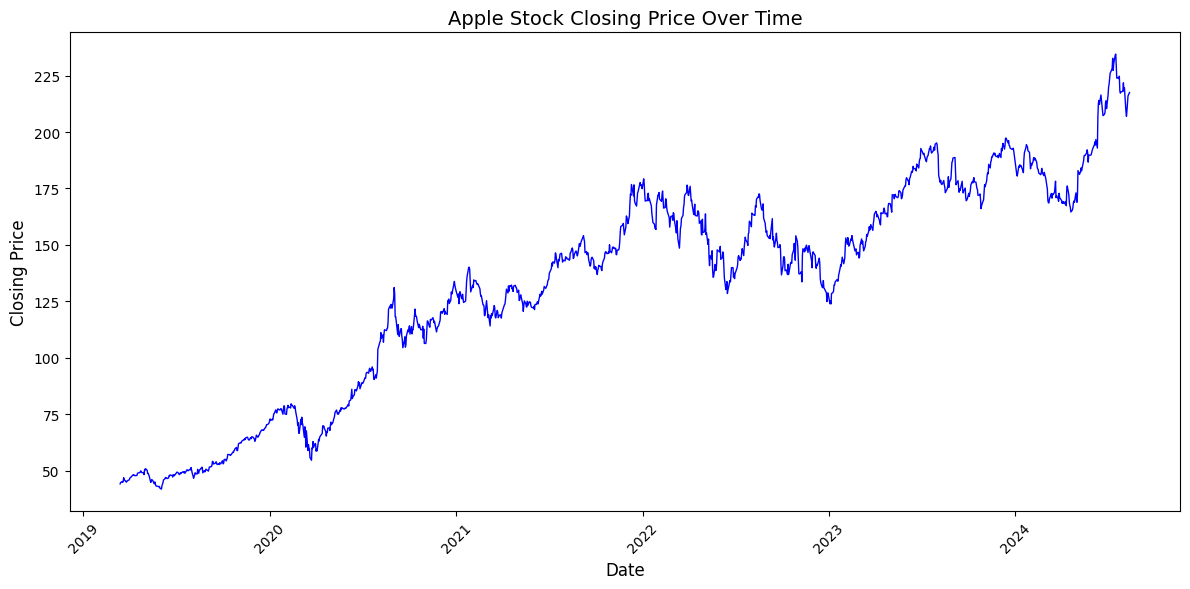

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data_filtered.index, stock_data_filtered['close'], linestyle='-', color='b', linewidth=1)
plt.title('Apple Stock Closing Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Calculate Z-scores
stock_data_filtered['z_score'] = stats.zscore(stock_data_filtered['close'])

# Define outliers as those with Z-scores > 3 or < -3
outliers = stock_data_filtered[(stock_data_filtered['z_score'] > 3) | (stock_data_filtered['z_score'] < -3)]

# Print number of outliers and the outliers themselves
print(f'Number of outliers: {outliers.shape[0]}')
print(outliers)

Number of outliers: 0
Empty DataFrame
Columns: [open, high, low, close, z_score]
Index: []


C:\Users\Acer\AppData\Local\Temp\ipykernel_14032\3148896026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered['z_score'] = stats.zscore(stock_data_filtered['close'])


In [15]:
# data from 2019 onwards to avoid extreme outliers 
del stock_data_filtered["z_score"]

stock_data_filtered

,open,high,low,close
Date,,,,
2019-01-02,37.025776,37.972398,36.868005,37.750084
2019-01-03,34.417789,34.833729,33.944479,33.989899
2019-01-04,34.549264,35.510228,34.374761,35.440903
2019-01-07,35.546089,35.577166,34.876760,35.362022
2019-01-08,35.751657,36.291902,35.503051,36.036121
...,...,...,...,...
2024-08-07,206.660786,213.392999,206.151381,209.577423
2024-08-08,212.863619,213.952355,208.588569,213.063385
2024-08-09,211.854792,216.529374,211.724938,215.990005


In [16]:
# Feature Engineering 
# - adding new feature 
# ---------------------------------

# Adding indicators to the stock data

# Example: Calculate 10-day and 50-day SMAs
stock_data_filtered['SMA_10'] = stock_data_filtered['close'].rolling(window=10).mean()
stock_data_filtered['SMA_50'] = stock_data_filtered['close'].rolling(window=50).mean()

# Example: Calculate 10-day and 50-day EMAs
stock_data_filtered['EMA_10'] = stock_data_filtered['close'].ewm(span=10, adjust=False).mean()
stock_data_filtered['EMA_50'] = stock_data_filtered['close'].ewm(span=50, adjust=False).mean()

# Calculate 14-day RSI using pandas_ta
stock_data_filtered['RSI_14'] = ta.rsi(stock_data_filtered['close'], length=14)

stock_data_filtered = stock_data_filtered.dropna()


C:\Users\Acer\AppData\Local\Temp\ipykernel_14032\437301792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered['SMA_10'] = stock_data_filtered['close'].rolling(window=10).mean()
C:\Users\Acer\AppData\Local\Temp\ipykernel_14032\437301792.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered['SMA_50'] = stock_data_filtered['close'].rolling(window=50).mean()
C:\Users\Acer\AppData\Local\Temp\ipykernel_14032\437301792.py:12: SettingWithCopyWarning: 
A value is trying to be s

In [17]:
stock_data_filtered

,open,high,low,close,SMA_10,SMA_50,EMA_10,EMA_50,RSI_14
Date,,,,,,,,,
2019-03-14,44.149027,44.197044,43.827333,44.108215,42.529271,39.632642,42.745326,40.479822,75.107703
2019-03-15,44.377093,44.972467,44.110614,44.681980,42.796950,39.771280,43.097445,40.644612,77.642037
2019-03-18,44.605154,45.226936,44.602751,45.138111,43.089116,39.994244,43.468475,40.820828,79.434607
2019-03-19,45.217353,45.370998,44.633979,44.780422,43.353194,40.181035,43.707011,40.976106,74.397264
2019-03-20,44.708391,45.491025,44.348285,45.171730,43.680651,40.377229,43.973323,41.140640,76.177116
...,...,...,...,...,...,...,...,...,...
2024-08-07,206.660786,213.392999,206.151381,209.577423,215.661377,213.523448,215.031755,211.991406,40.192311
2024-08-08,212.863619,213.952355,208.588569,213.063385,215.243860,213.989309,214.673869,212.033445,45.237936
2024-08-09,211.854792,216.529374,211.724938,215.990005,215.072060,214.507709,214.913167,212.188604,49.118928


In [18]:
# objective now to predict price up or down
# add new comlumn tommorow based on closing price 
stock_data_filtered["tomorrow"] = stock_data_filtered["close"].shift(-1)

# convet to 1 or 0 
stock_data_filtered["target"] = (stock_data_filtered["tomorrow"] > stock_data_filtered["close"]).astype(int)

stock_data_filtered = stock_data_filtered.dropna()


C:\Users\Acer\AppData\Local\Temp\ipykernel_14032\1962636339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered["tomorrow"] = stock_data_filtered["close"].shift(-1)
C:\Users\Acer\AppData\Local\Temp\ipykernel_14032\1962636339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered["target"] = (stock_data_filtered["tomorrow"] > stock_data_filtered["close"]).astype(int)


In [19]:
stock_data_filtered

,open,high,low,close,SMA_10,SMA_50,EMA_10,EMA_50,RSI_14,tomorrow,target
Date,,,,,,,,,,,
2019-03-14,44.149027,44.197044,43.827333,44.108215,42.529271,39.632642,42.745326,40.479822,75.107703,44.681980,1
2019-03-15,44.377093,44.972467,44.110614,44.681980,42.796950,39.771280,43.097445,40.644612,77.642037,45.138111,1
2019-03-18,44.605154,45.226936,44.602751,45.138111,43.089116,39.994244,43.468475,40.820828,79.434607,44.780422,0
2019-03-19,45.217353,45.370998,44.633979,44.780422,43.353194,40.181035,43.707011,40.976106,74.397264,45.171730,1
2019-03-20,44.708391,45.491025,44.348285,45.171730,43.680651,40.377229,43.973323,41.140640,76.177116,46.835426,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-06,205.062641,209.747221,200.837536,206.990402,216.532367,213.127107,216.243828,212.089936,36.137468,209.577423,1
2024-08-07,206.660786,213.392999,206.151381,209.577423,215.661377,213.523448,215.031755,211.991406,40.192311,213.063385,1
2024-08-08,212.863619,213.952355,208.588569,213.063385,215.243860,213.989309,214.673869,212.033445,45.237936,215.990005,1


In [20]:
# inspect the data see the correlation between each column 

# Calculate the correlation matrix
correlation_matrix = stock_data_filtered.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# To focus specifically on how each column correlates with 'close'
close_correlations = correlation_matrix['close']

# Print the correlations with the 'close' column
print("\nCorrelation with 'close':")
print(close_correlations)

Correlation Matrix:
              open      high       low     close    SMA_10    SMA_50  \
open      1.000000  0.999583  0.999585  0.999079  0.996958  0.980512   
high      0.999583  1.000000  0.999454  0.999582  0.996990  0.981046   
low       0.999585  0.999454  1.000000  0.999571  0.996481  0.979827   
close     0.999079  0.999582  0.999571  1.000000  0.996404  0.980229   
SMA_10    0.996958  0.996990  0.996481  0.996404  1.000000  0.986897   
SMA_50    0.980512  0.981046  0.979827  0.980229  0.986897  1.000000   
EMA_10    0.997835  0.997935  0.997453  0.997430  0.999803  0.987518   
EMA_50    0.986785  0.987223  0.986200  0.986478  0.992234  0.998908   
RSI_14   -0.125204 -0.124739 -0.116390 -0.115708 -0.177270 -0.284236   
tomorrow  0.997693  0.998219  0.998281  0.998630  0.995145  0.979059   
target   -0.027272 -0.026907 -0.026636 -0.027155 -0.025085 -0.025051   

            EMA_10    EMA_50    RSI_14  tomorrow    target  
open      0.997835  0.986785 -0.125204  0.997693 -0.02

In [21]:
# format using minmaxscalar 
#-------------------------------------

from sklearn.preprocessing import MinMaxScaler

# Create the scaler instance
scaler = MinMaxScaler(feature_range=(0, 1))

stock_data_scaled = scaler.fit_transform(stock_data_filtered)

# Check the min and max values for scaled training data
print("Scaled Train Data - Min:", stock_data_scaled.min())
print("Scaled Train Data - Max:", stock_data_scaled.max())

# Fit a separate scaler for the target column
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(stock_data_filtered[['tomorrow']])


Scaled Train Data - Min: 0.0
Scaled Train Data - Max: 1.0


MinMaxScaler()

In [23]:
# Preparing the data to train the LSTM model
# --------------------------------------------------------

# Initialize an empty list to store our input sequences
input_sequences = []

# Number of days to look back in the past to make predictions
look_back_days = 90 

# These columns include open, high, low, close, S MA_10, SMA_50, EMA_10, EMA_50, and RSI_14
for feature_index in range(9): 
    input_sequences.append([])  # Create a new sublist for each feature
    
    # Loop over each day in the dataset, starting from the 60th day
    for current_day in range(look_back_days, stock_data_scaled.shape[0]):
        # For each day, take the last 60 days of data for that feature and add it to input_sequences
        input_sequences[feature_index].append(stock_data_scaled[current_day-look_back_days:current_day, feature_index])

# Move the axis from position 0 to position 2 to get the correct shape for LSTM input
# This transforms the data to have the correct structure (samples, time steps, features)
input_sequences = np.moveaxis(input_sequences, [0], [2])

# Prepare the target variable
# The target is the column `-2`, which corresponds to 'tomorrow' in your dataset
# The LSTM model will try to predict this value
X_data, y_target = np.array(input_sequences), np.array(stock_data_scaled[look_back_days:, -2]) 

# Reshape y_target to be a 2D array (required for LSTM)
y_target_reshaped = np.reshape(y_target, (len(y_target), 1))

# Output the prepared input sequences (X_data) and target values (y_target_reshaped)
# This is to verify that everything is in the correct format for the LSTM model

print(X_data)
print(y_target_reshaped)
print(X_data.shape)
print(y_target_reshaped.shape)


[[[9.63669800e-03 6.79703951e-03 1.45633829e-02 ... 0.00000000e+00
   0.00000000e+00 8.36707358e-01]
  [1.08127417e-02 1.07924643e-02 1.60404502e-02 ... 1.90083801e-03
   9.58353459e-04 8.76804469e-01]
  [1.19887593e-02 1.21036325e-02 1.86065183e-02 ... 3.90376444e-03
   1.98315066e-03 9.05165726e-01]
  ...
  [3.54919875e-02 3.47192278e-02 4.20075697e-02 ... 3.37565117e-02
   3.99670588e-02 6.35149428e-01]
  [3.77164440e-02 3.54891081e-02 4.03237568e-02 ... 3.35844798e-02
   4.03025428e-02 5.23771791e-01]
  [3.50570372e-02 3.63955812e-02 4.18944896e-02 ... 3.45389011e-02
   4.08793446e-02 6.33265306e-01]]

 [[1.08127417e-02 1.07924643e-02 1.60404502e-02 ... 1.90083801e-03
   9.58353459e-04 8.76804469e-01]
  [1.19887593e-02 1.21036325e-02 1.86065183e-02 ... 3.90376444e-03
   1.98315066e-03 9.05165726e-01]
  [1.51456239e-02 1.28459227e-02 1.87693465e-02 ... 5.19144859e-03
   2.88618442e-03 8.25467110e-01]
  ...
  [3.77164440e-02 3.54891081e-02 4.03237568e-02 ... 3.35844798e-02
   4.03025

In [24]:
# Define the split limit at 80% of the dataset length
# This will be used to split the data into training and testing sets
split_limit = int(len(X_data) * 0.8)

# Split the input sequences into training and testing sets
X_train, X_test = X_data[:split_limit], X_data[split_limit:]

# Split the target values into training and testing sets
y_train, y_test = y_target_reshaped[:split_limit], y_target_reshaped[split_limit:]

# Print the shapes of the training and testing sets to ensure the split was successful
print(X_train.shape)  # Shape of the training set inputs
print(X_test.shape)   # Shape of the testing set inputs
print(y_train.shape)  # Shape of the training set targets
print(y_test.shape)   # Shape of the testing set targets

# Output the training targets to verify the split
print(y_train)

(1018, 90, 9)
(255, 90, 9)
(1018, 1)
(255, 1)
[[0.04421531]
 [0.04215265]
 [0.04305276]
 ...
 [0.72129848]
 [0.70511546]
 [0.71001166]]


In [25]:
from keras.models import Model
from keras.layers import LSTM, Dense, Input, Activation
from keras import optimizers
import numpy as np

# Set random seeds for reproducibility
np.random.seed(10)

# Define the input layer for the LSTM model
# The shape is (look_back_days, 9) where look_back_days is the number of time steps
# and 9 is the number of features (open, high, low, close, SMA_10, etc.)
lstm_input_layer = Input(shape=(look_back_days, 9), name='lstm_input')

# Add an LSTM layer with 150 units (neurons)
lstm_output = LSTM(150, name='lstm_layer')(lstm_input_layer)

# Add a Dense layer with 1 unit for the output (predicting the 'tomorrow' price)
dense_output = Dense(1, name='dense_layer')(lstm_output)

# Use a linear activation function for the output layer
model_output = Activation('linear', name='output')(dense_output)

# Define the model with the specified input and output layers
lstm_model = Model(inputs=lstm_input_layer, outputs=model_output)

# Compile the model using the Adam optimizer and Mean Squared Error (MSE) loss function
adam_optimizer = optimizers.Adam()
lstm_model.compile(optimizer=adam_optimizer, loss='mse')

# Train the model on the training data
# batch_size: Number of samples per gradient update
# epochs: Number of times to iterate over the training data
# shuffle: Shuffle the training data before each epoch
# validation_split: Fraction of the training data to be used as validation data
lstm_model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)


Epoch 1/30
62/62 [==============================] - 6s 68ms/step - loss: 0.0088 - val_loss: 6.9178e-04
Epoch 2/30
62/62 [==============================] - 4s 57ms/step - loss: 5.2559e-04 - val_loss: 0.0012
Epoch 3/30
62/62 [==============================] - 4s 57ms/step - loss: 4.8543e-04 - val_loss: 2.8357e-04
Epoch 4/30
62/62 [==============================] - 4s 57ms/step - loss: 4.6892e-04 - val_loss: 2.6998e-04
Epoch 5/30
62/62 [==============================] - 4s 57ms/step - loss: 4.4543e-04 - val_loss: 2.7742e-04
Epoch 6/30
62/62 [==============================] - 4s 58ms/step - loss: 4.7401e-04 - val_loss: 4.8247e-04
Epoch 7/30
62/62 [==============================] - 4s 57ms/step - loss: 4.6263e-04 - val_loss: 3.9744e-04
Epoch 8/30
62/62 [==============================] - 4s 59ms/step - loss: 4.2048e-04 - val_loss: 2.8491e-04
Epoch 9/30
62/62 [==============================] - 4s 58ms/step - loss: 4.8348e-04 - val_loss: 3.6668e-04
Epoch 10/30
62/62 [==========================

In [26]:
# Use the trained LSTM model to make predictions on the test data
predicted_values = lstm_model.predict(X_test)

# Print the first 10 predicted values and their corresponding actual values
# This is useful to see how well the model is performing at a glance
for i in range(10):
    print(f"Predicted: {predicted_values[i][0]}, Actual: {y_test[i][0]}")


8/8 [==============================] - 1s 32ms/step
Predicted: 0.6759256720542908, Actual: 0.7017140074919499
Predicted: 0.6732944846153259, Actual: 0.7005802678689393
Predicted: 0.667861819267273, Actual: 0.7008899013096833
Predicted: 0.6653103232383728, Actual: 0.709508348675669
Predicted: 0.6633580923080444, Actual: 0.6991352326624813
Predicted: 0.6727021336555481, Actual: 0.6945937838989305
Predicted: 0.6672897934913635, Actual: 0.6813306766224794
Predicted: 0.6609447598457336, Actual: 0.6838594288715414
Predicted: 0.6489396691322327, Actual: 0.6908263395875872
Predicted: 0.6451800465583801, Actual: 0.6979997517471148


In [30]:
from sklearn.metrics import r2_score


# Calculate the R-squared value to evaluate the model's performance
# Note: Ensure both predicted_values and y_test are flattened to 1D arrays for r2_score
r2 = r2_score(y_test, predicted_values)

# Print the R-squared value
print(f"\nR-squared value: {r2:.4f}")


R-squared value: 0.8358


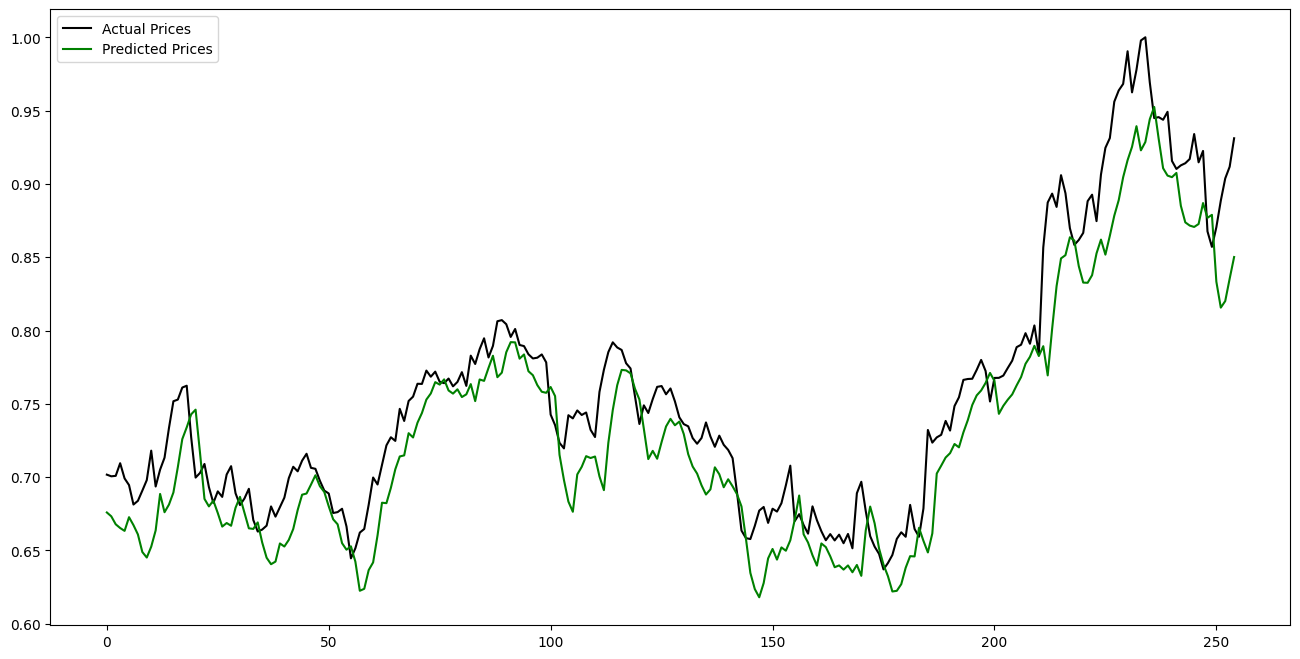

In [27]:
import matplotlib.pyplot as plt

# Set up the figure size for the plot
plt.figure(figsize=(16, 8))

# Plot the actual test values
plt.plot(y_test, color='black', label='Actual Prices')

# Plot the predicted values
plt.plot(predicted_values, color='green', label='Predicted Prices')

# Add a legend to differentiate between actual and predicted values
plt.legend()

# Display the plot
plt.show()


In [31]:
import pandas as pd
from datetime import timedelta

def predict_next_day(model, last_sequence):
    """
    Predict the next day's stock price based on the last `look_back_days` days.

    Parameters:
    - model: Trained LSTM model
    - last_sequence: Last `look_back_days` days of data (shape: [1, look_back_days, features])

    Returns:
    - Predicted next day's stock price
    """
    predicted_price = model.predict(last_sequence)
    return predicted_price[0, 0]

# Get the last `look_back_days` days from the test set to start predicting
last_sequence = X_test[-1:]

# Initialize a list to store the predictions for the next 5 business days
next_day_predictions = []

# Initialize a list to store the future dates
future_dates = []

# Get the last date from the test set
last_date = pd.to_datetime(stock_data.index[-1])

# Predict the next 5 business days
for day in range(5):
    # Predict the next day's price
    next_day_prediction = predict_next_day(lstm_model, last_sequence)
    next_day_predictions.append(next_day_prediction)
    
    # Update the last_sequence by removing the first day's data and adding the new prediction
    next_day_sequence = np.append(last_sequence[:, 1:, :], [[[next_day_prediction] * 9]], axis=1)
    last_sequence = next_day_sequence

    # Calculate the next business day and add it to the future_dates list
    last_date += timedelta(days=1)  # Increment by 1 day
    future_dates.append(last_date)

# Convert scaled predictions back to the original price scale using target_scaler
scaled_predictions = np.array(next_day_predictions).reshape(-1, 1)
price_predictions = target_scaler.inverse_transform(scaled_predictions)

# Print the predictions in original price format with corresponding dates
print("Predictions for the next 5 business days (in original price format):")
for date, pred in zip(future_dates, price_predictions):
    print(f"Date: {date.date()}, Predicted Price: {pred[0]}")


1/1 [==============================] - 0s 27ms/step
Predictions for the next 5 business days (in original price format):
Date: 2024-08-14, Predicted Price: 205.65760803222656
Date: 2024-08-15, Predicted Price: 214.22900390625
Date: 2024-08-16, Predicted Price: 217.6273956298828
Date: 2024-08-17, Predicted Price: 218.80670166015625
Date: 2024-08-18, Predicted Price: 218.9329833984375
